In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)


In [9]:
df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


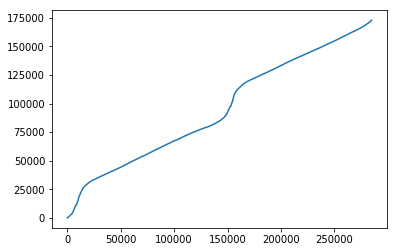

In [11]:
plt.plot(df["Time"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [ ]:
temp_df = df.iloc[0:10000]
cor_mat = temp_df.corr().apply(lambda x: abs(x))
sns.heatmap(cor_mat, vmax=.8, square=True)
# Pairplot
# sns.pairplot(temp_df, hue="class", palette="Set2", diag_kind="kde", size=2.5)

In [ ]:
temp_df = df.iloc[0:300000][["Time", "Amount", "Class"]]
cor_mat = temp_df.corr().apply(lambda x: abs(x))
sns.heatmap(cor_mat, vmax=.8, square=True)
# Pairplot
# sns.pairplot(temp_df, hue="class", palette="Set2", diag_kind="kde", size=2.5)

In [ ]:
from pandasql import sqldf

In [ ]:
df[['Class', 'Amount']].groupby(by=["Class"]).mean()

In [ ]:
df[['Class', 'Amount']].groupby(by=["Class"]).quantile(0.2)

In [ ]:
df[['Class', 'Amount']].groupby(by=["Class"]).quantile(0.5)

In [ ]:
df[['Class', 'Amount']].groupby(by=["Class"]).quantile(0.90)

In [ ]:
df[['Class', 'Time']].groupby(by=["Class"]).mean()

In [ ]:
sqldf("""select Class, AVG(Amount) AS avg_amount FROM df group by 1""")

In [ ]:
sqldf("""select Class, AVG(Time) AS avg_time FROM df group by 1""")

In [ ]:
sns.countplot(y="Amount", hue="Class", data=df, palette="Set2")